In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series

from sklearn.metrics import f1_score

In [342]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [343]:
from geoband.API import *

GetCompasData('PJT002_train.csv')
GetCompasData('PJT002_test.csv')
GetCompasData('PJT002_validation.csv')
GetCompasData('PJT002_submission.csv')

train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
c1 = train.columns[172:]
c2 = train.columns[137:151]
c3 = train.columns[17:137]
X_train = train.drop(c1,1)
X_train = X_train.drop(c2,1)
#X_train = X_train.drop(c3,1)
X_train = X_train.drop(['cctv_in_100m','fr_wthr_fclt_in_100m'],1)
X_val = val.drop(c1,1)
X_val = X_val.drop(c2,1)
#X_val = X_val.drop(c3,1)
X_val = X_val.drop(['cctv_in_100m','fr_wthr_fclt_in_100m'],1)

test = test.drop(c1,1)
test = test.drop(c2,1)
#test = test.drop(c3,1)

X_train = X_train.drop(['fr_yn', 'dt_of_fr','id'], 1)
y_train = train['fr_yn']
X_val = X_val.drop(['fr_yn', 'dt_of_fr','id'], 1)
y_val = val['fr_yn']
test = test.drop(['dt_of_fr','id'], 1)


In [ ]:
train.fr_yn = train.fr_yn.map({'Y':1,'N':0})
val.fr_yn = val.fr_yn.map({'Y':1,'N':0})
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn'].sum() / len(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of ', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of temp(-10~x)')
plt.show()

In [ ]:
X_train.loc[X_train['tbc_rtl_str_dstnc'] <= 100, 'tbc_rtl_str_dstnc'] = 0
X_train.loc[(X_train['tbc_rtl_str_dstnc'] > 100) & (X_train['tbc_rtl_str_dstnc'] <= 200), 'tbc_rtl_str_dstnc'] = 1
X_train.loc[(X_train['tbc_rtl_str_dstnc'] > 200) & (X_train['tbc_rtl_str_dstnc'] <= 300), 'tbc_rtl_str_dstnc'] = 2
X_train.loc[(X_train['tbc_rtl_str_dstnc'] > 300), 'tbc_rtl_str_dstnc'] = 3

X_val.loc[X_val['tbc_rtl_str_dstnc'] <= 100, 'tbc_rtl_str_dstnc'] = 0
X_val.loc[(X_val['tbc_rtl_str_dstnc'] > 100) & (X_val['tbc_rtl_str_dstnc'] <= 200), 'tbc_rtl_str_dstnc'] = 1
X_val.loc[(X_val['tbc_rtl_str_dstnc'] > 200) & (X_val['tbc_rtl_str_dstnc'] <= 300), 'tbc_rtl_str_dstnc'] = 2
X_val.loc[(X_val['tbc_rtl_str_dstnc'] > 300), 'tbc_rtl_str_dstnc'] = 3

In [ ]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['sft_emrgnc_bll_dstnc'] < i]['fr_yn'].sum() / len(train[train['sft_emrgnc_bll_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of ', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of temp(-10~x)')
plt.show()

In [ ]:
X_train.loc[X_train['sft_emrgnc_bll_dstnc'] <= 50, 'sft_emrgnc_bll_dstnc'] = 0
X_train.loc[(X_train['sft_emrgnc_bll_dstnc'] > 50) & (X_train['sft_emrgnc_bll_dstnc'] <= 100), 'sft_emrgnc_bll_dstnc'] = 1
X_train.loc[(X_train['sft_emrgnc_bll_dstnc'] > 100) & (X_train['sft_emrgnc_bll_dstnc'] <= 200), 'sft_emrgnc_bll_dstnc'] = 2
X_train.loc[(X_train['sft_emrgnc_bll_dstnc'] > 200), 'sft_emrgnc_bll_dstnc'] = 3

X_val.loc[X_val['sft_emrgnc_bll_dstnc'] <= 50, 'sft_emrgnc_bll_dstnc'] = 0
X_val.loc[(X_val['sft_emrgnc_bll_dstnc'] > 50) & (X_val['sft_emrgnc_bll_dstnc'] <= 100), 'sft_emrgnc_bll_dstnc'] = 1
X_val.loc[(X_val['sft_emrgnc_bll_dstnc'] > 100) & (X_val['sft_emrgnc_bll_dstnc'] <= 200), 'sft_emrgnc_bll_dstnc'] = 2
X_val.loc[(X_val['sft_emrgnc_bll_dstnc'] > 200), 'sft_emrgnc_bll_dstnc'] = 3

In [ ]:
df_all = pd.concat([X_train, X_val, test])

categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

X_train = df_all[:len(train)]
X_val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

In [ ]:
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred, pos_label='Y')

In [ ]:
y = model.predict(test)

In [ ]:
sub['fr_yn'] = y
sub.head()

In [ ]:
sub.to_csv('baseline_rf.csv', index=False)

In [ ]:
# ----------------여기까지----------------

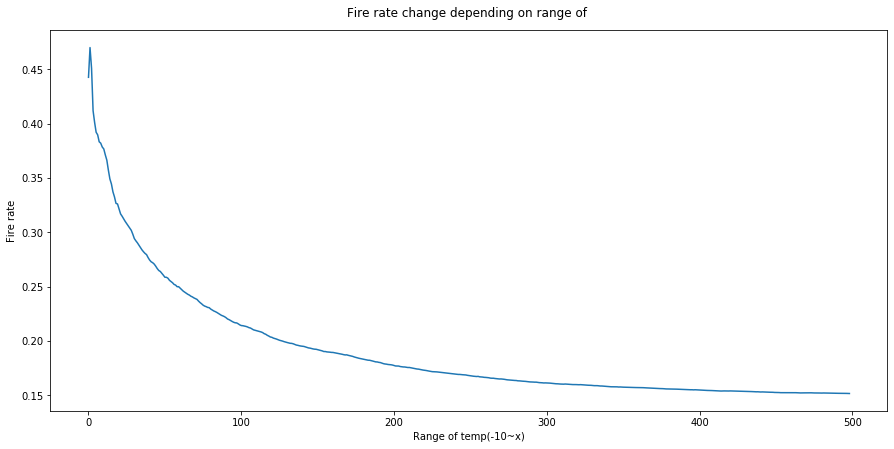

In [104]:
train.fr_yn = train.fr_yn.map({'Y':1,'N':0})
val.fr_yn = val.fr_yn.map({'Y':1,'N':0})
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['no_tbc_zn_dstnc'] < i]['fr_yn'].sum() / len(train[train['no_tbc_zn_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of ', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of temp(-10~x)')
plt.show()

In [325]:
X_train.loc[X_train['no_tbc_zn_dstnc'] <= 50, 'no_tbc_zn_dstnc'] = 0
X_train.loc[(X_train['no_tbc_zn_dstnc'] > 50) & (X_train['no_tbc_zn_dstnc'] <= 100), 'no_tbc_zn_dstnc'] = 1
X_train.loc[(X_train['no_tbc_zn_dstnc'] > 100) & (X_train['no_tbc_zn_dstnc'] <= 200), 'no_tbc_zn_dstnc'] = 2
X_train.loc[(X_train['no_tbc_zn_dstnc'] > 200), 'no_tbc_zn_dstnc'] = 3

X_val.loc[X_val['no_tbc_zn_dstnc'] <= 50, 'no_tbc_zn_dstnc'] = 0
X_val.loc[(X_val['no_tbc_zn_dstnc'] > 50) & (X_val['no_tbc_zn_dstnc'] <= 100), 'no_tbc_zn_dstnc'] = 1
X_val.loc[(X_val['no_tbc_zn_dstnc'] > 100) & (X_val['no_tbc_zn_dstnc'] <= 200), 'no_tbc_zn_dstnc'] = 2
X_val.loc[(X_val['no_tbc_zn_dstnc'] > 200), 'no_tbc_zn_dstnc'] = 3

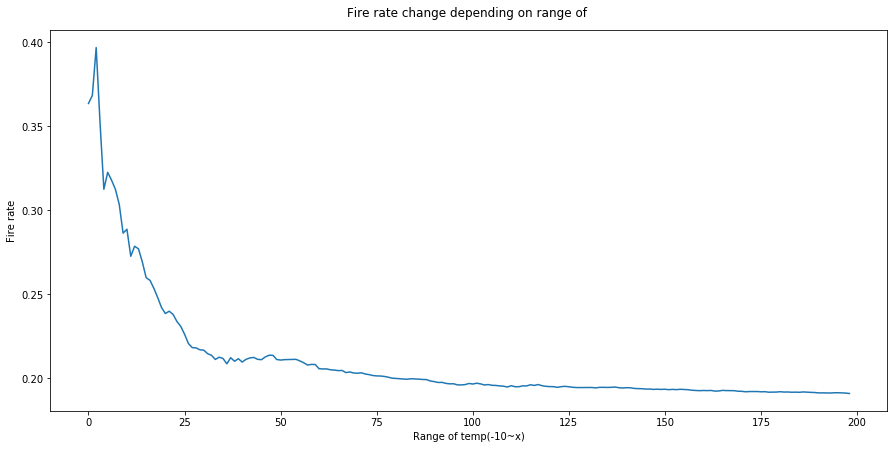

In [126]:
train.fr_yn = train.fr_yn.map({'Y':1,'N':0})
val.fr_yn = val.fr_yn.map({'Y':1,'N':0})
cummulate_fire_ratio = []
for i in range(1, 200):
    cummulate_fire_ratio.append(train[train['fr_wthr_fclt_dstnc'] < i]['fr_yn'].sum() / len(train[train['fr_wthr_fclt_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of ', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of temp(-10~x)')
plt.show()

In [317]:
X_train.loc[X_train['fr_wthr_fclt_dstnc'] <= 12, 'fr_wthr_fclt_dstnc'] = 0
X_train.loc[(X_train['fr_wthr_fclt_dstnc'] > 12) & (X_train['fr_wthr_fclt_dstnc'] <= 25), 'fr_wthr_fclt_dstnc'] = 1
X_train.loc[(X_train['fr_wthr_fclt_dstnc'] > 25) & (X_train['fr_wthr_fclt_dstnc'] <= 70), 'fr_wthr_fclt_dstnc'] = 2
X_train.loc[(X_train['fr_wthr_fclt_dstnc'] > 70), 'fr_wthr_fclt_dstnc'] = 3

X_val.loc[X_val['fr_wthr_fclt_dstnc'] <= 12, 'fr_wthr_fclt_dstnc'] = 0
X_val.loc[(X_val['fr_wthr_fclt_dstnc'] > 12) & (X_val['fr_wthr_fclt_dstnc'] <= 25), 'fr_wthr_fclt_dstnc'] = 1
X_val.loc[(X_val['fr_wthr_fclt_dstnc'] > 25) & (X_val['fr_wthr_fclt_dstnc'] <= 70), 'fr_wthr_fclt_dstnc'] = 2
X_val.loc[(X_val['fr_wthr_fclt_dstnc'] > 70), 'fr_wthr_fclt_dstnc'] = 3

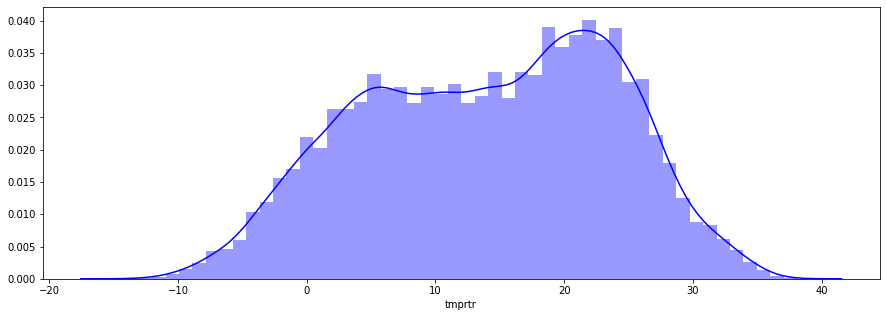

In [46]:
#train['ttl_ar'] = train['ttl_ar'].map(lambda i: np.log(i) if i>0 else 0)
train = train.fillna(-1)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.distplot(train['tmprtr'], color='b', label='Skewness:{:.2f}'.format(train['tmprtr'].skew()), ax=ax)
plt.show()

In [275]:
train.columns[17:137]

Index(['gas_engry_us_201401', 'ele_engry_us_201401', 'gas_engry_us_201402',
       'ele_engry_us_201402', 'gas_engry_us_201403', 'ele_engry_us_201403',
       'gas_engry_us_201404', 'ele_engry_us_201404', 'gas_engry_us_201405',
       'ele_engry_us_201405',
       ...
       'ele_engry_us_201808', 'gas_engry_us_201809', 'ele_engry_us_201809',
       'gas_engry_us_201810', 'ele_engry_us_201810', 'gas_engry_us_201811',
       'ele_engry_us_201811', 'gas_engry_us_201812', 'ele_engry_us_201812',
       'lw_13101010'],
      dtype='object', length=121)

In [51]:
train.columns[137:153]

Index(['lw_13101010', 'lw_13101110', 'lw_13101210', 'lw_13101211',
       'lw_13101310', 'lw_13101410', 'lw_13111010', 'lw_13111110',
       'lw_13121010', 'lw_13121011', 'lw_13131010', 'lw_13131110',
       'lw_13141010', 'lw_13141011', 'jmk', 'id'],
      dtype='object')

In [13]:
X_train = train.drop(['fr_yn', 'dt_of_fr','id'], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr','id'], 1)
y_val = val['fr_yn']

In [98]:
from sklearn.model_selection import train_test_split

X = train.drop(['fr_yn', 'dt_of_fr'], 1)
y = train['fr_yn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [363]:
X_train.loc[X_train['hmdt'] <= 20, 'hmdt'] = 0
X_train.loc[(X_train['hmdt'] > 20) & (X_train['hmdt'] <= 40), 'hmdt'] = 1
X_train.loc[(X_train['hmdt'] > 40) & (X_train['hmdt'] <= 60), 'hmdt'] = 2
X_train.loc[(X_train['hmdt'] > 60), 'hmdt'] = 3

#X_val.loc[X_val['hmdt'] <= 20, 'hmdt'] = 0
#X_val.loc[(X_val['hmdt'] > 20) & (X_val['hmdt'] <= 50), 'hmdt'] = 1
#X_val.loc[(X_val['hmdt'] > 40) & (X_val['hmdt'] <= 60), 'hmdt'] = 2
#X_val.loc[(X_val['hmdt'] > 50), 'hmdt'] = 2

In [364]:
X_train.prcpttn.unique()

X_train.loc[:,'prcpttn'] = X_train.groupby('hmdt')['prcpttn'].transform(lambda x : x.fillna(x.mean()))

X_train.loc[X_train['prcpttn'] <= 3, 'prcpttn'] = 0
X_train.loc[(X_train['prcpttn'] > 3) & (X_train['prcpttn'] <= 10), 'prcpttn'] = 1
X_train.loc[(X_train['prcpttn'] > 10) & (X_train['prcpttn'] <= 30), 'prcpttn'] = 2
X_train.loc[(X_train['prcpttn']) > 30, 'prcpttn'] = 3

In [391]:
train2 = train.loc[train.fr_yn == 'Y']
train2.loc[train2.bldng_us=='단독주택','ele_engry_us_201401']

0        0.0
5        0.0
10       0.0
14       0.0
16       0.0
        ... 
59016    0.0
59051    0.0
59064    0.0
59076    0.0
59133    0.0
Name: ele_engry_us_201401, Length: 3523, dtype: float64

In [27]:
X_train = train.drop(['fr_yn', 'dt_of_fr', 'id'], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr', 'id'], 1)
y_val = val['fr_yn']
test = test.drop(['fr_yn', 'dt_of_fr', 'id'], 1)

combine = [X_train, X_val, test]

In [8]:
#train.fr_yn = train.fr_yn.map({'Y':1,'N':0})
#train2 = train[['fr_yn','bldng_us']].groupby(['bldng_us'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

#for data in combine:
train2

,bldng_us,fr_yn
3,관광휴게시설,0.700000
24,의료시설,0.666667
26,장례식장,0.666667
33,판매시설,0.653846
1,공동주택,0.619554
15,분뇨.쓰레기처리시설,0.618182
16,수련시설,0.600000
25,자동차관련시설,0.563025
2,공장,0.553011
19,업무시설,0.541985


In [24]:
train[['fr_yn','bldng_archtctr']].groupby(['bldng_archtctr'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)
train.bldng_archtctr.value_counts()

벽돌구조           7377
일반목구조          6852
철근콘크리트구조       6694
블록구조           4087
경량철골구조         3378
일반철골구조         1938
조적구조            398
강파이프구조          395
기타조적구조          176
석구조              55
철골철근콘크리트구조       43
기타강구조            36
철골콘크리트구조         35
기타구조             27
목구조              17
프리케스트콘크리트구조      14
통나무구조            11
기타콘크리트구조          1
Name: bldng_archtctr, dtype: int64

In [28]:
#train[['fr_yn','bldng_us_clssfctn']].groupby(['bldng_us_clssfctn'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)
train.bldng_us_clssfctn.value_counts()

주거용      19589
상업용       5389
기타        1899
농수산용      1225
공업용       1043
문교사회용      677
공공용         34
Name: bldng_us_clssfctn, dtype: int64

In [216]:
X_train.loc[X_train['no_tbc_zn_dstnc'] <= 100, 'no_tbc_zn_dstnc'] = 3
X_train.loc[(X_train['no_tbc_zn_dstnc'] > 100) & (X_train['no_tbc_zn_dstnc'] <= 500), 'no_tbc_zn_dstnc'] = 2
X_train.loc[(X_train['no_tbc_zn_dstnc'] > 500) & (X_train['no_tbc_zn_dstnc'] <= 2000), 'no_tbc_zn_dstnc'] = 1
X_train.loc[(X_train['no_tbc_zn_dstnc'] > 2000), 'no_tbc_zn_dstnc'] = 0

X_val.loc[X_val['no_tbc_zn_dstnc'] <= 100, 'no_tbc_zn_dstnc'] = 3
X_val.loc[(X_val['no_tbc_zn_dstnc'] > 100) & (X_val['no_tbc_zn_dstnc'] <= 500), 'no_tbc_zn_dstnc'] = 2
X_val.loc[(X_val['no_tbc_zn_dstnc'] > 500) & (X_val['no_tbc_zn_dstnc'] <= 2000), 'no_tbc_zn_dstnc'] = 1
X_val.loc[(X_val['no_tbc_zn_dstnc'] > 2000), 'no_tbc_zn_dstnc'] = 0

In [25]:
build = []
for i in train.bldng_us :
    if (i=='단독주택') | (i=='공동주택'):
        build.append('주거시설')
    elif (i=='종교시설') | (i=='운동시설') | (i=='문화및집회시설') | (i=='수련시설'):
        build.append('집합시설')
    elif (i=='공장') | (i=='동.식물 관련시설') | (i=='창고시설') | (i=='분뇨.쓰레기처리시설') | (i=='발전시설'):
        build.append('산업시설')
    elif (i=='교육연구시설') | (i=='교육연구및복지시설'):
        build.append('교육시설')
    elif (i=='숙박시설') | (i=='업무시설') | (i=='판매시설') | (i=='공공용시설') | (i=='교정및군사시설') | (i=='판매및영업시설') | (i=='파출소') | (i=='시장') | (i=='관광휴게시설') | (i=='방송통신시설'):
        build.append('판매및업무시설')
    elif (i=='자동차관련시설') | (i=='운수시설'):
        build.append('운수자동차시설')
    elif (i=='의료시설') | (i=='노유자시설'):
        build.append('의료복지시설')
    elif (i=='위락시설'):
        build.append('생활서비스')
    elif (i=='제1종근린생활시설') | (i=='제2종근린생활시설') | (i=='근린생활시설'):
        build.append('근린생활시설')
    else :
        build.append(i)

#train.bldng_us = build

#train2 = train[['fr_yn','bldng_us']].groupby(['bldng_us'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

train.bldng_us.value_counts()

단독주택          20232
제1종근린생활시설      2350
제2종근린생활시설      2262
창고시설           1513
동.식물 관련시설      1467
공장             1179
공동주택            941
숙박시설            262
노유자시설           205
교육연구시설          185
종교시설            161
업무시설            131
자동차관련시설         119
위험물저장및처리시설      115
분뇨.쓰레기처리시설       55
판매시설             52
운동시설             42
문화및집회시설          38
위락시설             35
근린생활시설           31
관광휴게시설           30
의료시설             27
교육연구및복지시설        18
수련시설             15
운수시설             12
방송통신시설           11
발전시설             11
묘지관련시설            9
교정및군사시설           7
장례식장              3
공공용시설             1
시장                1
판매및영업시설           1
파출소               1
Name: bldng_us, dtype: int64

In [273]:
train.loc[:,'dt_of_athrztn'].astype('str').str[:4].unique()

year = X_train.loc[:,'dt_of_athrztn'].astype('str').str[:4].astype('float')
print(year.unique)
X_train.loc[year <= 1900, 'dt_of_athrztn'] = 0
X_train.loc[(year > 1900) & (year <= 1950), 'dt_of_athrztn'] = 1
X_train.loc[(year > 1950) & (year <= 2000), 'dt_of_athrztn'] = 2
X_train.loc[(year > 2000), 'dt_of_athrztn'] = 3

<bound method Series.unique of 0        1977.0
1           NaN
2        2000.0
3        1936.0
4           NaN
          ...  
59194    1996.0
59195       NaN
59196       NaN
59197    2005.0
59198    2002.0
Name: dt_of_athrztn, Length: 59199, dtype: float64>


In [320]:
#train = pd.read_csv('PJT002_train.csv')
year = train.loc[:,'dt_of_athrztn'].astype('str').str[:4].astype('float')

train.loc[year <= 1950, 'dt_of_athrztn'] = 0
train.loc[(year > 1950) & (year <= 2000), 'dt_of_athrztn'] = 1
train.loc[(year > 2000) & (year <= 2010), 'dt_of_athrztn'] = 2
train.loc[(year > 2010), 'dt_of_athrztn'] = 3

In [321]:
train.dt_of_athrztn = train.dt_of_athrztn.fillna(4)
train.fr_wthr_fclt_dstnc = train.groupby('dt_of_athrztn')['fr_wthr_fclt_dstnc'].transform(lambda x : x.fillna(x.mean()))

dis = train.fr_wthr_fclt_dstnc
train.loc[dis <= 50, 'fr_wthr_fclt_dstnc'] = 3
train.loc[(dis > 50) & (dis <= 100), 'fr_wthr_fclt_dstnc'] = 2
train.loc[(dis > 100) & (dis <= 300), 'fr_wthr_fclt_dstnc'] = 1
train.loc[dis > 300, 'fr_wthr_fclt_dstnc'] = 0